In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
# %config InlineBackend. figure_format = 'retina'

In [7]:
all= pd.read_csv('../AllWindowData.csv')
# all= pd.read_csv('../AllWindowData_relative.csv')

data = pd.DataFrame({'id':all["userId"],"case":all['caseNum'], '':all['type'],'Environment': all[ "environment"],'Distance':all["distance"],'Window Anchor':all['windowMode'],'Opacity':all['transparency'],'Perceived Size':all['visual angle'],'Meeting Format':all['Meeting type'], 'Horizontal Placement':all['theta'], 'Vertical Placement':all['phi'], 'Offset':all['offset'], 'Scale': all['scale'], 'Depth':all['z']})
data[''] = data[''].replace({0: 'Shared Screen', 1: 'Active Speaker'})
data['Window Anchor'] = data['Window Anchor'].replace({0: 'Path Anchor', 1: 'Head Anchor'})
data['Meeting Format'] = data['Meeting Format'].replace({1: 'Listening', 2: 'Discussion'})
data['Environment'] = data['Environment'].replace({'low': 'Low-Traffic', 'high': 'High-Traffic'})
data['Opacity']=1-data['Opacity']

In [8]:
# 寫平均的數字
def add_median_labels(ax, mean, fmt = ".2f"):
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if "Patch" in str(c)]
    start = 4
    if not boxes:  # seaborn v0.13 => fill=False => no patches => +1 line
        boxes = [c for c in ax.get_lines() if len(c.get_xdata()) == 5]
        start += 1
    lines_per_box = len(lines) // len(boxes)
    xlist = []
    for median in lines[start::lines_per_box]:
        x, y = (data.mean() for data in median.get_data())
        xlist.append((x, y))
    xlist = sorted(xlist, key=lambda x: x[0])
    yrange = (ax.get_ylim()[1] - ax.get_ylim()[0]) / 30
    for i in range(4):
        value = mean[i]
        offset = yrange * (1 if value > xlist[i][1] else -1)
        ax.text(xlist[i][0], value + offset, f'{value:{fmt}}', ha='center', va='center', color='red')
        # print(value, value + offset)


def draw(para, title1, title2, value, color1, color2):
    plt.figure(figsize=(6, 4))
    # y可以改成Visual Angle、Opacity、Distance#CFE2F3""#D9EAD3"
    ax = sns.boxplot(data=data, x='', y=value, hue=para, width=0.6,# positions=[-1,1],
                showmeans=True,meanprops={ "markerfacecolor":"black","markeredgecolor":"black", "marker": '.','markersize':'5'},#meanline=True, meanprops={ "color":"black", "linestyle": '-', "linewidth":0.5},  medianprops={'visible': False},             
                boxprops={'zorder': 2}, palette={title1:color1,title2: color2},legend=None, color="black", saturation=1) 
    handles, _ = ax.get_legend_handles_labels()
    plt.legend(handles=handles, labels=[title1, title2], title=para)
    

    # 调整图的大小
    # val = 1.5
    # ax.set_xlim(-val, 1+val)

    # 计算平均值
    print(data.groupby(['', para])[value].agg(mean='mean'))
    # mean = data.groupby(['', para])[value].mean().values.tolist()
    # mean.reverse()
    # add_median_labels(ax, mean)
    ax.spines['right'].set_visible(False)
    plt.xlim(-0.4, 3.5)
    if value == "Perceived Size":
        ax.set_ylabel(value+" (deg²)")
    elif value not in ['Horizontal Placement', 'Vertical Placement']:
        plt.ylim(bottom=0) # 设置 Y 轴范围从 0 开始
    
    else:
        plt.ylim(-65, 65)
        ax.set_ylabel(value+" (deg)")

    figure = ax.get_figure()
    figure.savefig(f'img/{para}_{value}.png', dpi=500)
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                                     mean
               Meeting Format            
Active Speaker Discussion      148.086902
               Listening       118.354889
Shared Screen  Discussion      714.562173
               Listening       832.361606


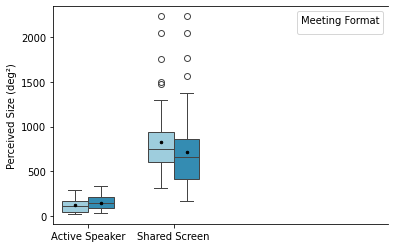

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                                   mean
               Meeting Format          
Active Speaker Discussion      3.586083
               Listening       7.746917
Shared Screen  Discussion     -6.419734
               Listening      -4.174984


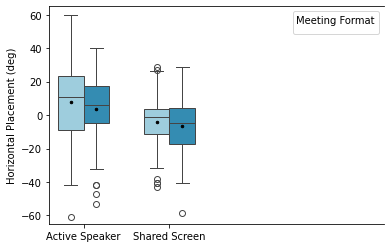

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                                    mean
               Meeting Format           
Active Speaker Discussion     -14.319428
               Listening      -13.888358
Shared Screen  Discussion     -15.968824
               Listening      -15.147029


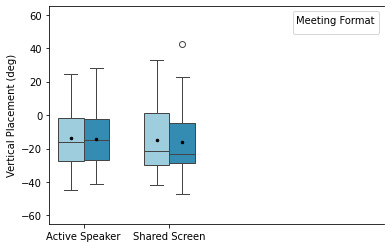

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                                   mean
               Meeting Format          
Active Speaker Discussion      0.845530
               Listening       0.788925
Shared Screen  Discussion      0.806547
               Listening       0.843437


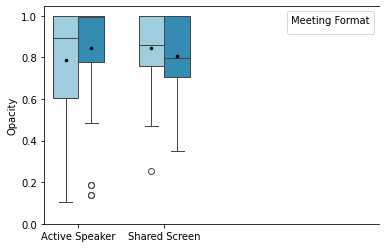

In [9]:
### 不同會議
e1 = "#f9cb9c"
e2 =  "#e69138"
m1 = "#9ecddd"
m2 = "#348cb2"
w1 = "#a9ce91"
w2 = "#4f962a"
draw('Meeting Format', 'Listening', 'Discussion', 'Perceived Size', m1, m2)
# draw('Meeting Format', 'Listening', 'Discussion', 'Offset')
draw('Meeting Format', 'Listening', 'Discussion', 'Horizontal Placement', m1, m2)
draw('Meeting Format', 'Listening', 'Discussion', 'Vertical Placement', m1, m2)
draw('Meeting Format', 'Listening', 'Discussion', 'Opacity', m1, m2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                                   mean
               Environment             
Active Speaker High-Traffic  136.503889
               Low-Traffic   129.937902
Shared Screen  High-Traffic  708.552453
               Low-Traffic   838.371326


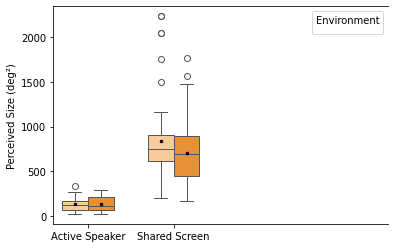

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                                 mean
               Environment           
Active Speaker High-Traffic  3.831821
               Low-Traffic   7.501179
Shared Screen  High-Traffic -4.716861
               Low-Traffic  -5.877857


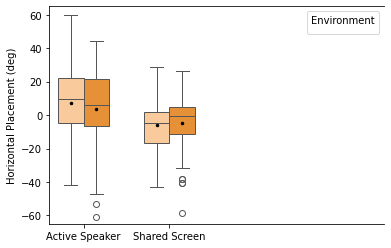

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                                  mean
               Environment            
Active Speaker High-Traffic -11.973411
               Low-Traffic  -16.234375
Shared Screen  High-Traffic -12.348728
               Low-Traffic  -18.767125


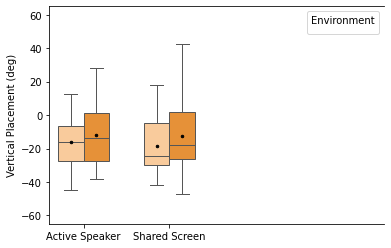

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                                 mean
               Environment           
Active Speaker High-Traffic  0.744468
               Low-Traffic   0.889987
Shared Screen  High-Traffic  0.812969
               Low-Traffic   0.837014


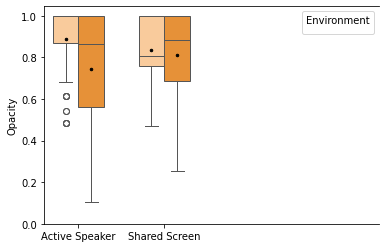

In [10]:
###不同環境
draw('Environment', 'Low-Traffic', 'High-Traffic', 'Perceived Size', e1, e2)
# draw('Environment', 'Low-Traffic', 'High-Traffic', 'Offset')
draw('Environment', 'Low-Traffic', 'High-Traffic', 'Horizontal Placement', e1, e2)
draw('Environment', 'Low-Traffic', 'High-Traffic', 'Vertical Placement', e1, e2)
draw('Environment', 'Low-Traffic', 'High-Traffic', 'Opacity', e1, e2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                                    mean
               Window Anchor            
Active Speaker Head Anchor    134.111503
               Path Anchor    132.330288
Shared Screen  Head Anchor    753.325830
               Path Anchor    793.597949


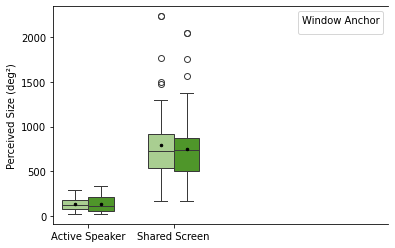

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                                  mean
               Window Anchor          
Active Speaker Head Anchor    4.561732
               Path Anchor    6.771269
Shared Screen  Head Anchor   -4.184868
               Path Anchor   -6.409851


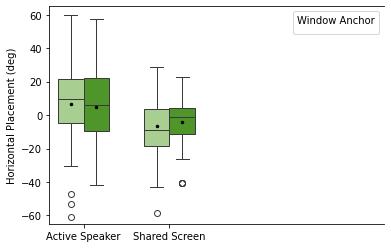

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                                   mean
               Window Anchor           
Active Speaker Head Anchor   -15.655246
               Path Anchor   -12.552539
Shared Screen  Head Anchor   -18.817558
               Path Anchor   -12.298295


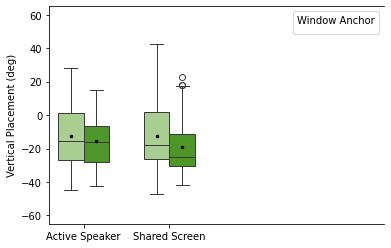

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                                  mean
               Window Anchor          
Active Speaker Head Anchor    0.804245
               Path Anchor    0.830210
Shared Screen  Head Anchor    0.813084
               Path Anchor    0.836899


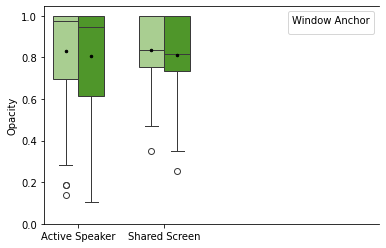

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                                  mean
               Window Anchor          
Active Speaker Head Anchor    0.715844
               Path Anchor    0.751674
Shared Screen  Head Anchor    0.760394
               Path Anchor    0.758643


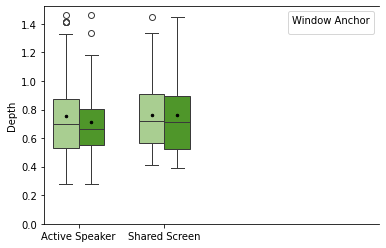

In [11]:
###不同環境
draw('Window Anchor', 'Path Anchor', 'Head Anchor', 'Perceived Size', w1, w2)
# draw('Window Anchor', 'Path Anchor', 'Head Anchor', 'Offset')
draw('Window Anchor', 'Path Anchor', 'Head Anchor', 'Horizontal Placement', w1, w2)
draw('Window Anchor', 'Path Anchor', 'Head Anchor', 'Vertical Placement', w1, w2)
draw('Window Anchor', 'Path Anchor', 'Head Anchor', 'Opacity', w1, w2)
draw('Window Anchor', 'Path Anchor', 'Head Anchor', 'Depth', w1, w2)

                                  mean
Window Type     Environment           
Shared Screen   High-Traffic  1.401610
                Low-Traffic   1.508728
Speaker's Video High-Traffic  0.745477
                Low-Traffic   0.752066


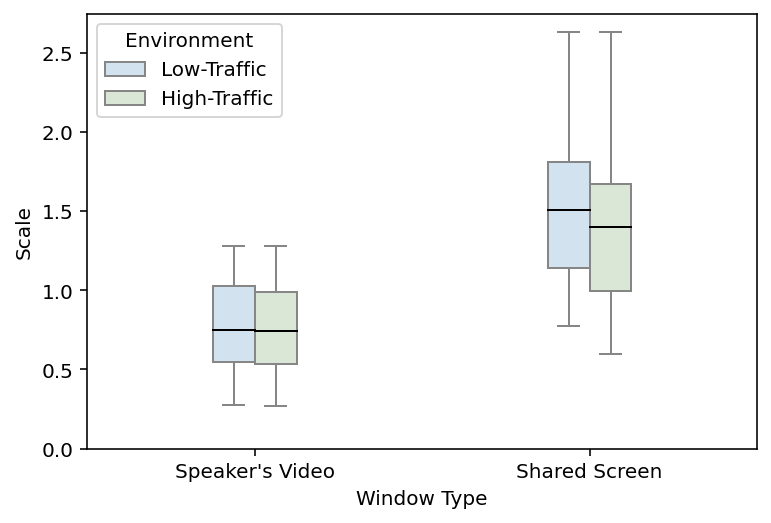

                                    mean
Window Type     Meeting Format          
Shared Screen   Discussion      1.397033
                Listening       1.513305
Speaker's Video Discussion      0.784612
                Listening       0.712931


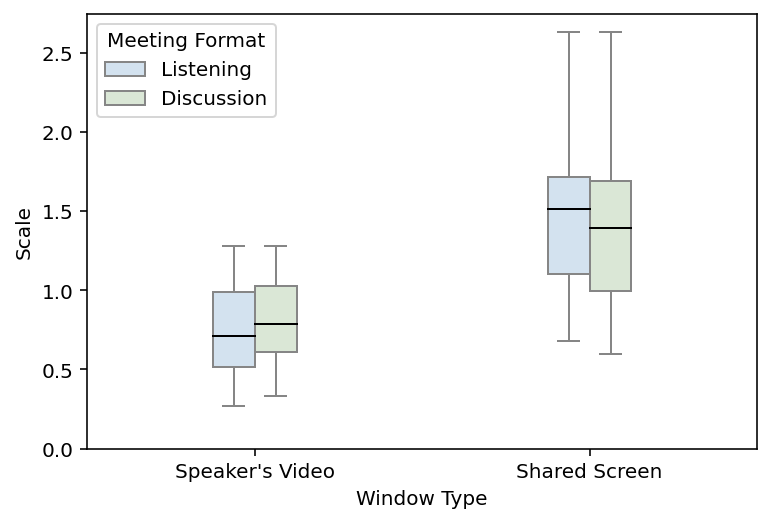

                                   mean
Window Type     Window Anchor          
Shared Screen   Head Anchor    1.427498
                Path Anchor    1.482840
Speaker's Video Head Anchor    0.720163
                Path Anchor    0.777380


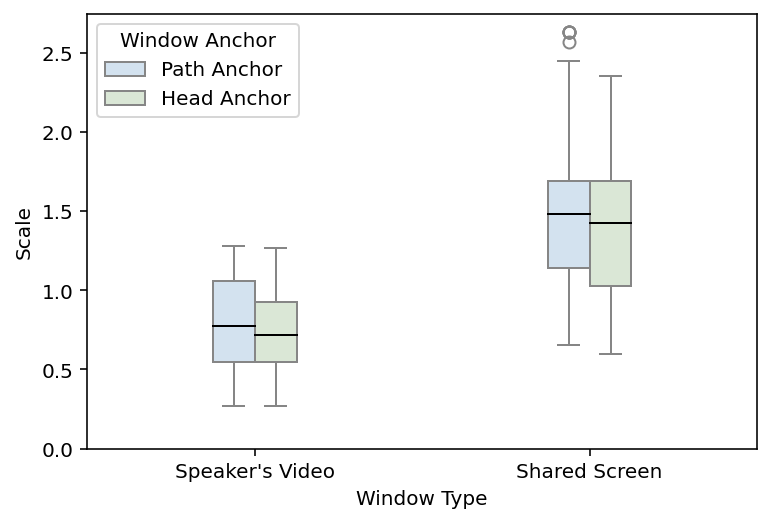

In [11]:
draw('Environment', 'Low-Traffic', 'High-Traffic', 'Scale')
draw('Meeting Format', 'Listening', 'Discussion', 'Scale')
draw('Window Anchor', 'Path Anchor', 'Head Anchor', 'Scale')

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt


# y可以改成Visual Angle、Opacity、Distance
ax=sns.boxplot(data=data, x='Window Type', y='Distance', hue='environment', width=0.3, boxprops={'zorder': 2}, palette={'low':"#CFE2F3",'high': "#D9EAD3"})


handles, _ = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=["Low-Traffic", "High-Traffic"], title="Environment")

plt.show()
#

NameError: name 'data' is not defined

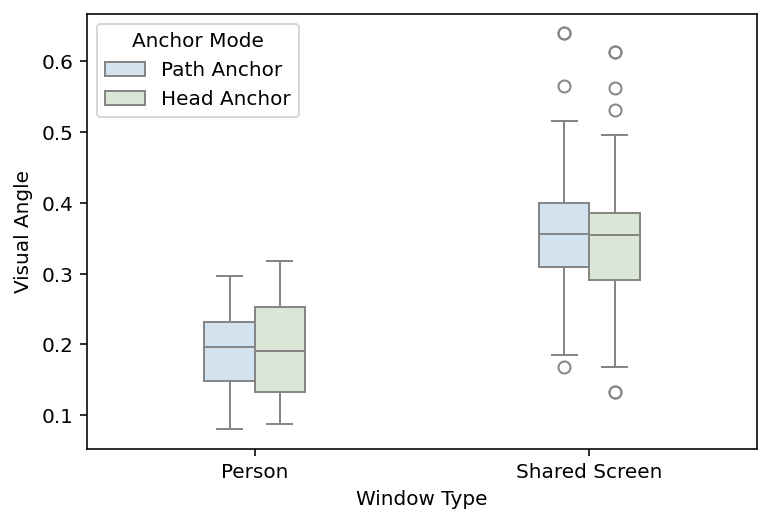

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


# y可以改成Visual Angle、Opacity、Distance
ax=sns.boxplot(data=data, x='Window Type', y='Visual Angle', hue='Window Anchor', width=0.2, boxprops={'zorder': 2}, palette={'Path anchor':"#CFE2F3",'Head anchor': "#D9EAD3"})


handles, _ = ax.get_legend_handles_labels()
plt.legend(handles=handles, labels=["Path Anchor", "Head Anchor"], title="Anchor Mode")

plt.show()


In [75]:
##############

[0.5014271845699213, 0.25192809608491235, 0.5014271845699213, 0.25192809608491235, 0.5014271845699213, 0.25192809608491235, 0.5014271845699213, 0.25192809608491235, 0.402701542221091, 0.41799583448323563, 0.20197874980715916, 0.20197874980715916, 0.2886247265527032, 0.33051306773379874, 0.17951178937519766, 0.21307785377315944, 0.6346177960184866, 0.6121445500756743, 0.6417345287125027, 0.6417345287125027, 0.4606425001673333, 0.49795710537841853, 0.2863602042934039, 0.2863602042934039, 0.590257585429068, 0.590257585429068, 0.29348123012018573, 0.29348123012018573, 0.39111600781884137, 0.37572513614993774, 0.20050573649944292, 0.20050573649944292, 0.5680130748684467, 0.5680130748684467, 0.3985363368653133, 0.3090528454989243, 0.11291965543837391, 0.5154039685775774, 0.44124015567555036, 0.44124015567555036, 0.33614311597761604, 0.34147188068844536, 0.2762442709148244, 0.2762442709148244, 0.29434291024751114, 0.29434291024751114, 0.13615055044000662, 0.13615055044000662, 0.89168807492924

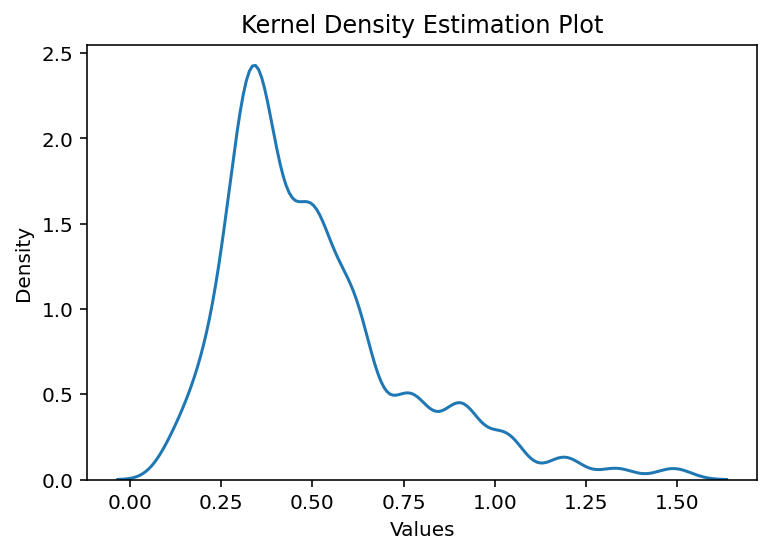

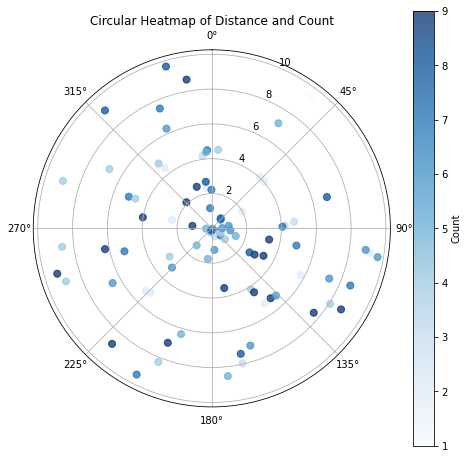

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# 生成一些示例数据，包括方向、距離和個數
directions = np.random.rand(100) * 360  # 0 到 360 之间的随机方向
distances = np.random.rand(100) * 10  # 0 到 10 之间的随机距离
counts = np.random.randint(1, 10, 100)  # 随机个数，假设每个方向有 1 到 10 个数据点

# 将角度转换为弧度
theta = np.radians(directions)

# 创建一个极坐标图
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='polar')

# 绘制圆形的热图
sc = ax.scatter(theta, distances, c=counts, cmap='Blues', s=50, alpha=0.75)

# 添加颜色条
cbar = plt.colorbar(sc)
cbar.set_label('Count')

# 设置极坐标的 0 度位置
ax.set_theta_zero_location('N')

# 设置极坐标的顺时针方向
ax.set_theta_direction(-1)

plt.title('Circular Heatmap of Distance and Count')
plt.show()
